# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

Required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.



In [1]:
#importin Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pd.set_option("display.max_columns",200)

import warnings
warnings.filterwarnings("ignore")

## 1.Access To Data

In [2]:
# Read the data
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# info of the housing data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2.Missing Values

In [4]:
# find the missing Values
pd.set_option("display.max_rows",500)
(housing.isnull().sum()/len(housing)).sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
LotConfig        0.000000
OverallCond      0.000000
OverallQual      0.000000
HouseStyle       0.000000
BldgType         0.000000
Condition2       0.000000
BsmtFinSF1       0.000000
MSZoning         0.000000
LotArea     

## 3.Visualising the Data

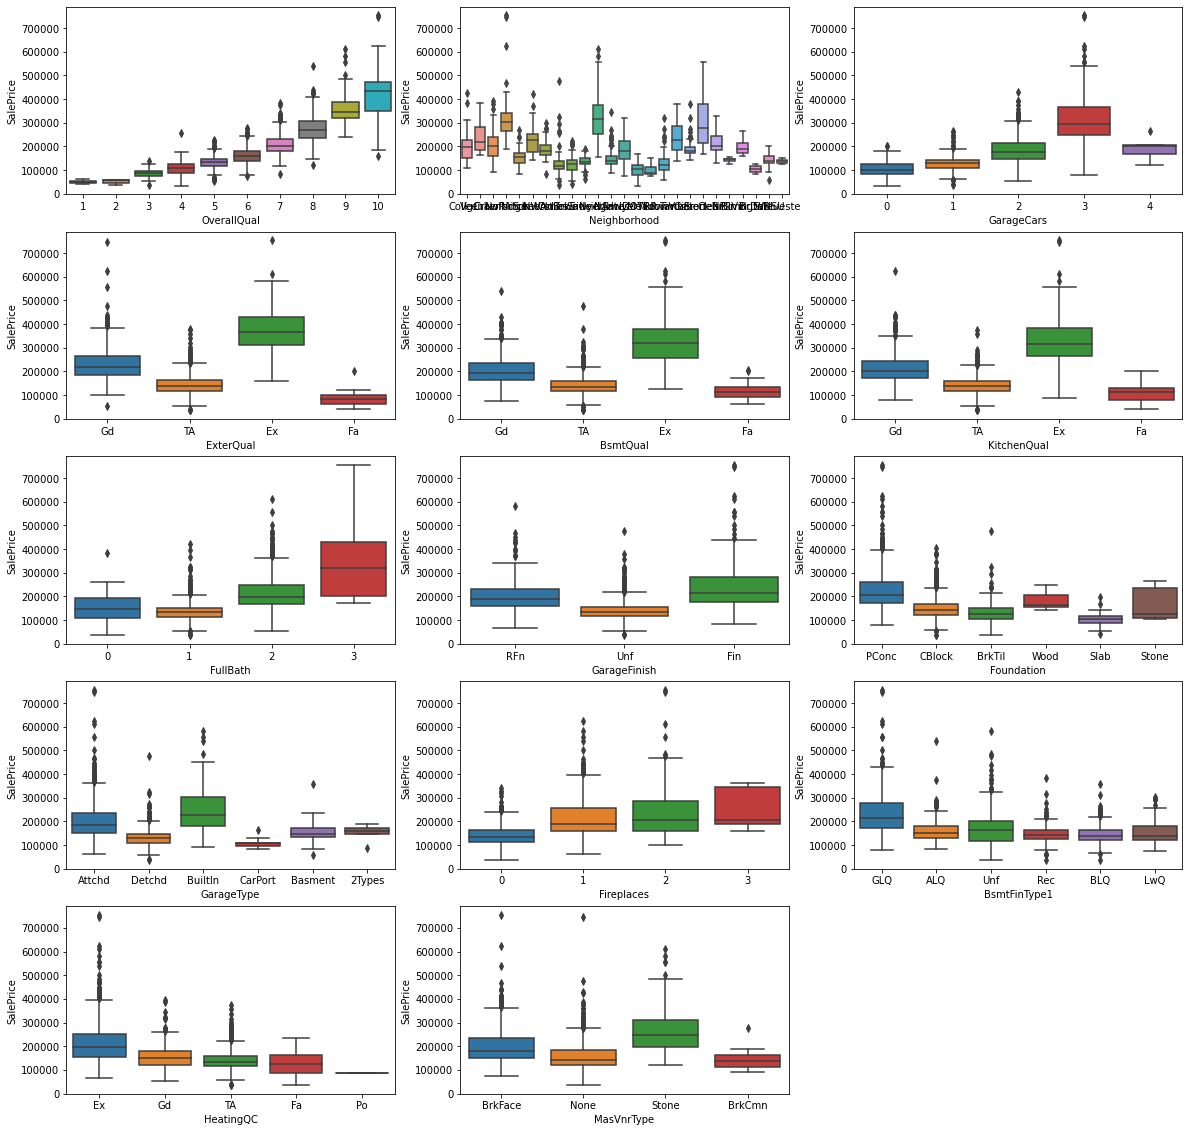

In [5]:
# Visualise the important Features
catcol = ["OverallQual","Neighborhood","GarageCars","ExterQual","BsmtQual","KitchenQual","FullBath","GarageFinish","Foundation","GarageType","Fireplaces","BsmtFinType1","HeatingQC","MasVnrType"]
plt.figure(figsize=(20, 20))
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter


for i in catcol:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.boxplot(x=housing[i],y="SalePrice",data=housing)
    c = c + 1

plt.show()

<Figure size 1800x1080 with 0 Axes>

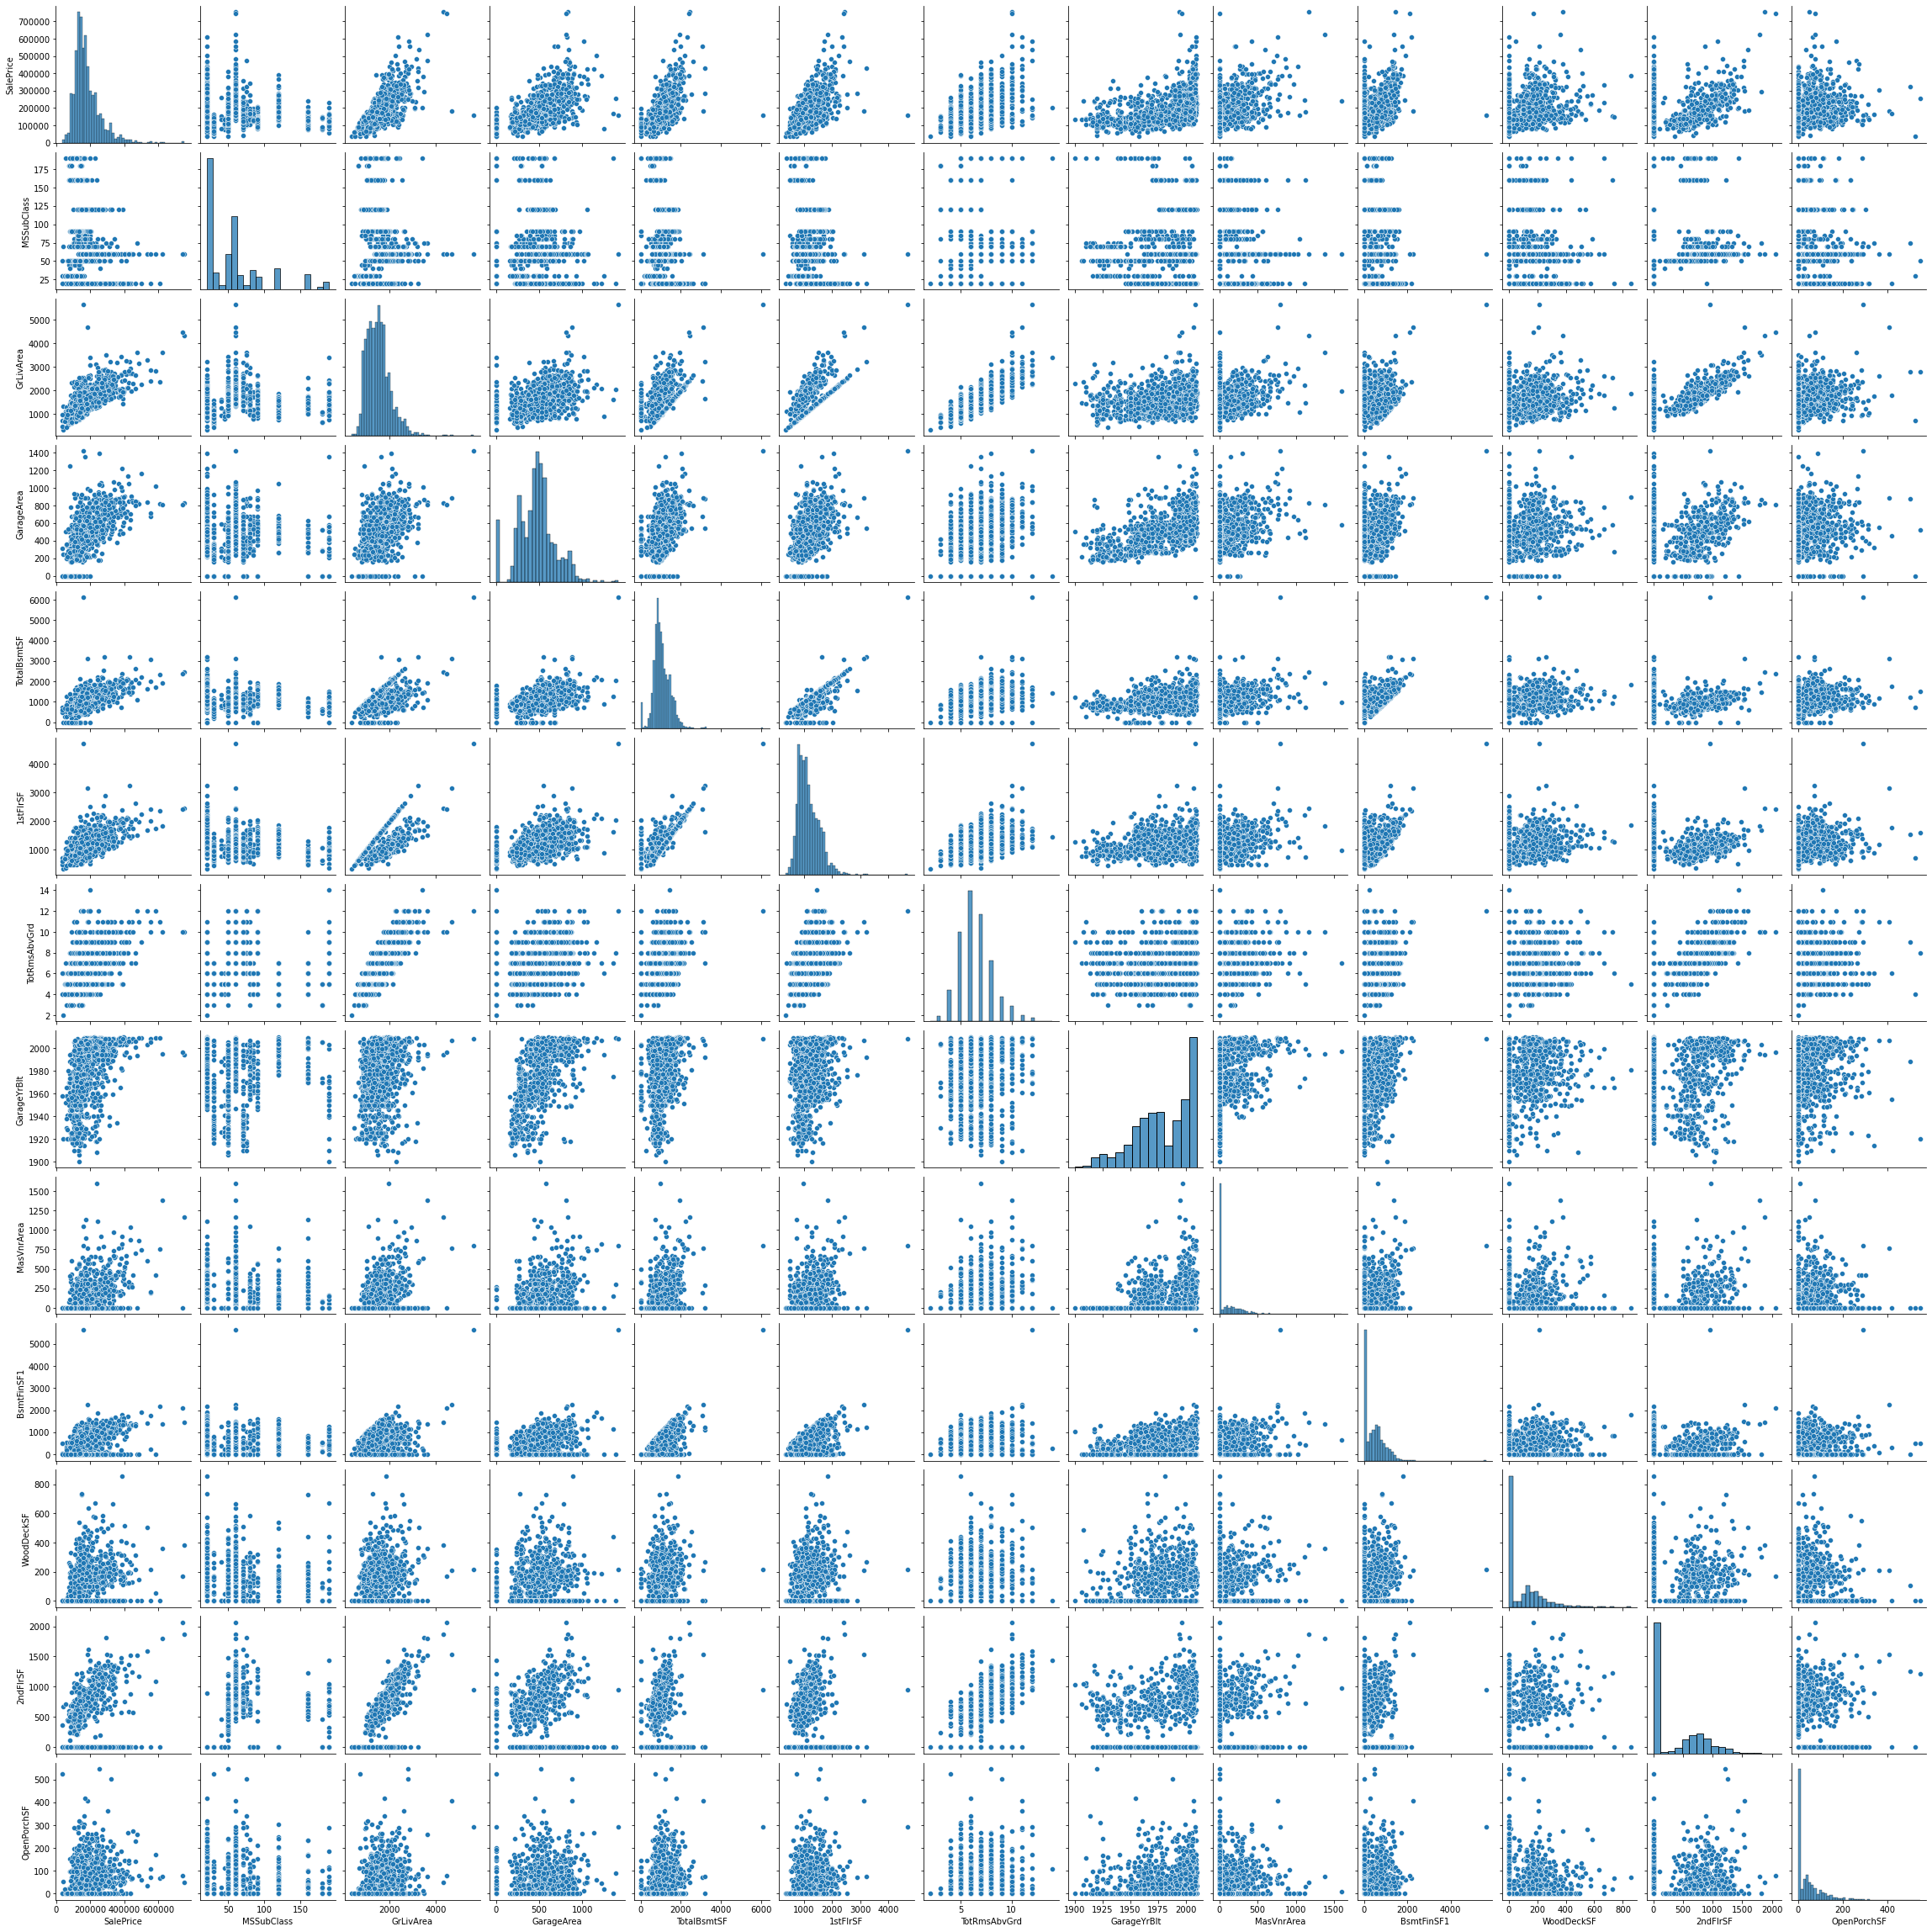

In [6]:
# Pair Plot of the numerical features
numcol = ["SalePrice","MSSubClass","GrLivArea","GarageArea","TotalBsmtSF","1stFlrSF","TotRmsAbvGrd","GarageYrBlt","MasVnrArea","BsmtFinSF1","WoodDeckSF","2ndFlrSF","OpenPorchSF"]
plt.figure(figsize = (25, 15))
sns.pairplot(data = housing,vars=numcol)
plt.show()

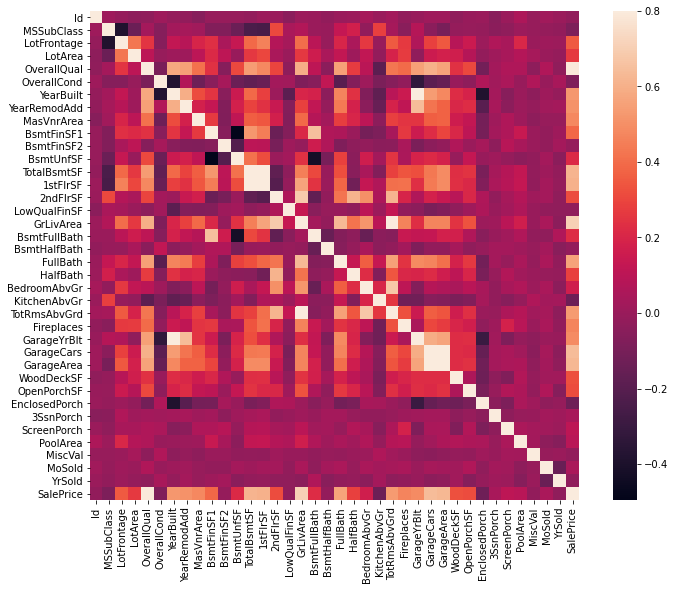

In [191]:
#correlation Features
corrmat = housinghoud.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


NameError: name 'corrmat' is not defined

In [192]:
# Impute the missing Values
missing_value = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage","GarageCond","GarageType","GarageYrBlt","GarageFinish","GarageQual","BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual","MasVnrArea","MasVnrType","Electrical"]

for i in missing_value:
    housing[i].fillna("None",inplace=True)

In [193]:
# seperate object and numerical column
cat_cols = list(housing.select_dtypes(include="object"))
num_cols = list(housing.select_dtypes(exclude="object"))

In [194]:
print("Total no of columns:", len(housing.columns))
print("Total object columns:", len(cat_cols))
print("Total numeric columns:", len(num_cols))

Total no of columns: 81
Total object columns: 46
Total numeric columns: 35


In [195]:
print(cat_cols)

['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [196]:
print(num_cols)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [197]:
# initiate the dummy values for categorical Variables
housing = pd.get_dummies(housing,columns=['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],drop_first=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

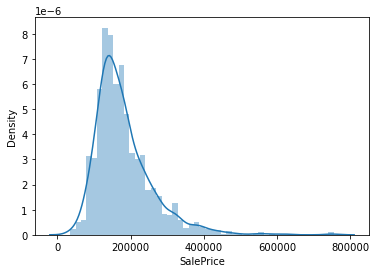

In [198]:
sns.distplot(housing['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

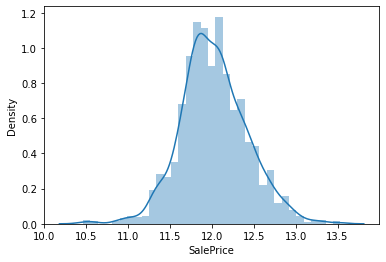

In [199]:
sns.distplot(np.log(housing["SalePrice"]))

## 4.Model Building

In [200]:
# Price transormed for training purpose
housing["TransformedPrice"] = np.log(housing["SalePrice"])



In [201]:
# Drop salesprice and ID
housing.drop("SalePrice",inplace=True,axis=1)
housing.drop("Id",inplace=True,axis=1)
housing

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage_24.0,LotFrontage_30.0,LotFrontage_32.0,LotFrontage_33.0,LotFrontage_34.0,LotFrontage_35.0,LotFrontage_36.0,LotFrontage_37.0,LotFrontage_38.0,LotFrontage_39.0,LotFrontage_40.0,LotFrontage_41.0,LotFrontage_42.0,LotFrontage_43.0,LotFrontage_44.0,LotFrontage_45.0,LotFrontage_46.0,LotFrontage_47.0,LotFrontage_48.0,LotFrontage_49.0,LotFrontage_50.0,LotFrontage_51.0,LotFrontage_52.0,LotFrontage_53.0,LotFrontage_54.0,LotFrontage_55.0,LotFrontage_56.0,LotFrontage_57.0,LotFrontage_58.0,LotFrontage_59.0,LotFrontage_60.0,LotFrontage_61.0,LotFrontage_62.0,LotFrontage_63.0,LotFrontage_64.0,LotFrontage_65.0,LotFrontage_66.0,LotFrontage_67.0,LotFrontage_68.0,LotFrontage_69.0,LotFrontage_70.0,LotFrontage_71.0,LotFrontage_72.0,LotFrontage_73.0,LotFrontage_74.0,LotFrontage_75.0,LotFrontage_76.0,LotFrontage_77.0,LotFrontage_78.0,LotFrontage_79.0,LotFrontage_80.0,LotFrontage_81.0,LotFrontage_82.0,LotFrontage_83.0,LotFrontage_84.0,LotFrontage_85.0,LotFrontage_86.0,LotFrontage_87.0,LotFrontage_88.0,LotFrontage_89.0,LotFrontage_90.0,LotFrontage_91.0,LotFrontage_92.0,...,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TransformedPrice
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.247694
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [202]:
y=housing.pop('TransformedPrice')
X = housing
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage_24.0,LotFrontage_30.0,LotFrontage_32.0,LotFrontage_33.0,LotFrontage_34.0,LotFrontage_35.0,LotFrontage_36.0,LotFrontage_37.0,LotFrontage_38.0,LotFrontage_39.0,LotFrontage_40.0,LotFrontage_41.0,LotFrontage_42.0,LotFrontage_43.0,LotFrontage_44.0,LotFrontage_45.0,LotFrontage_46.0,LotFrontage_47.0,LotFrontage_48.0,LotFrontage_49.0,LotFrontage_50.0,LotFrontage_51.0,LotFrontage_52.0,LotFrontage_53.0,LotFrontage_54.0,LotFrontage_55.0,LotFrontage_56.0,LotFrontage_57.0,LotFrontage_58.0,LotFrontage_59.0,LotFrontage_60.0,LotFrontage_61.0,LotFrontage_62.0,LotFrontage_63.0,LotFrontage_64.0,LotFrontage_65.0,LotFrontage_66.0,LotFrontage_67.0,LotFrontage_68.0,LotFrontage_69.0,LotFrontage_70.0,LotFrontage_71.0,LotFrontage_72.0,LotFrontage_73.0,LotFrontage_74.0,LotFrontage_75.0,LotFrontage_76.0,LotFrontage_77.0,LotFrontage_78.0,LotFrontage_79.0,LotFrontage_80.0,LotFrontage_81.0,LotFrontage_82.0,LotFrontage_83.0,LotFrontage_84.0,LotFrontage_85.0,LotFrontage_86.0,LotFrontage_87.0,LotFrontage_88.0,LotFrontage_89.0,LotFrontage_90.0,LotFrontage_91.0,LotFrontage_92.0,...,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [203]:
#Using Standard scaler
scaler = StandardScaler()

num_colsII = list(housing.select_dtypes(exclude="object"))
#Fit and transform training set only
housing[num_colsII] = scaler.fit_transform(housing[num_colsII])

In [204]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [205]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [206]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [207]:
# Find the best estimator
print(lasso_model_cv.best_estimator_)
print(lasso_model_cv.best_score_)

Lasso(alpha=0.01)
-0.0878602922973629


In [208]:
# View the data using dataframe of cross validation and its parameter
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.232489,0.010200,0.006812,0.002296,0.0001,{'alpha': 0.0001},-0.132416,-0.126351,-0.126657,-0.119462,-0.104939,-0.121965,0.009451,3,-0.028296,-0.029831,-0.030563,-0.031047,-0.029880,-0.029923,0.000931
1,0.238820,0.037680,0.004784,0.000746,0.001,{'alpha': 0.001},-0.097990,-0.098246,-0.100462,-0.087505,-0.080681,-0.092977,0.007616,2,-0.041852,-0.042870,-0.042631,-0.043681,-0.042548,-0.042716,0.000589
2,0.024902,0.003847,0.005886,0.000177,0.01,{'alpha': 0.01},-0.080258,-0.098782,-0.095108,-0.080002,-0.085152,-0.087860,0.007729,1,-0.078170,-0.076868,-0.077022,-0.077921,-0.077744,-0.077545,0.000511
3,0.020071,0.001760,0.005586,0.000482,0.05,{'alpha': 0.05},-0.113006,-0.131359,-0.123783,-0.121064,-0.125242,-0.122891,0.005985,4,-0.124720,-0.113045,-0.117101,-0.121722,-0.124104,-0.120139,0.004444
4,0.020107,0.000655,0.005910,0.000139,0.1,{'alpha': 0.1},-0.156139,-0.170042,-0.160873,-0.158609,-0.162810,-0.161695,0.004733,5,-0.162583,-0.155039,-0.159267,-0.160779,-0.164800,-0.160494,0.003294


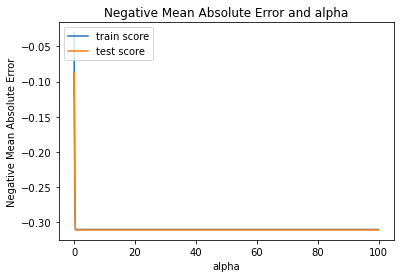

In [209]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [210]:
# find the coef values
alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-3.38613341e-03,  1.36922128e-02,  9.58581231e-02,  3.21960033e-02,
        5.73110054e-02,  2.60294802e-02,  2.26555078e-02,  0.00000000e+00,
       -0.00000000e+00,  4.09365589e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.37531395e-01,  1.26986780e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.22224302e-03,
        0.00000000e+00,  9.24927096e-03,  1.99190538e-02,  2.33228092e-02,
        4.61736743e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.60021389e-03,
       -1.06816406e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [211]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [212]:
# Find the best estimator
print(model_cv.best_estimator_)
print(model_cv.best_score_)

Ridge(alpha=500)
-0.09912361458647681


In [213]:
# View the data using dataframe of cross validation and its parameter
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031598,0.002005,0.005071,0.000362,0.0001,{'alpha': 0.0001},-0.156909,-0.154203,-0.171931,-0.151883,-0.137659,-0.154517,0.010956,28,-0.026157,-0.027772,-0.028050,-0.029196,-0.028124,-0.027860,0.000980
1,0.029516,0.001744,0.005916,0.001370,0.001,{'alpha': 0.001},-0.156883,-0.154130,-0.171837,-0.151868,-0.137550,-0.154454,0.010960,27,-0.026159,-0.027773,-0.028051,-0.029196,-0.028123,-0.027860,0.000979
2,0.028987,0.002206,0.004959,0.000875,0.01,{'alpha': 0.01},-0.156638,-0.153442,-0.170952,-0.151720,-0.136505,-0.153852,0.011007,26,-0.026174,-0.027792,-0.028055,-0.029199,-0.028118,-0.027868,0.000974
3,0.029487,0.002164,0.005798,0.000385,0.05,{'alpha': 0.05},-0.155752,-0.151013,-0.168073,-0.151161,-0.132691,-0.151738,0.011372,25,-0.026226,-0.027896,-0.028083,-0.029216,-0.028112,-0.027906,0.000960
4,0.031797,0.002186,0.005713,0.000388,0.1,{'alpha': 0.1},-0.155024,-0.149022,-0.165606,-0.150503,-0.129456,-0.149922,0.011765,24,-0.026269,-0.028009,-0.028146,-0.029234,-0.028131,-0.027958,0.000954


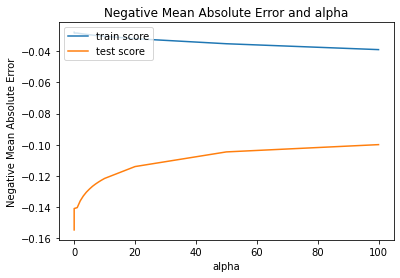

In [214]:
# Plotting Negative mean abolute error and alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [215]:
# Finding the coef values
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.25344465e-03,  1.21179285e-02,  3.48071076e-02,  2.16363693e-02,
        1.19681600e-02,  1.81574263e-02,  1.65888933e-02,  2.56589482e-03,
        5.91028251e-03,  2.41429698e-02,  2.79227992e-02,  1.58532040e-02,
       -4.91002172e-04,  3.36665509e-02,  1.31131317e-02,  9.13821788e-04,
        1.71033393e-02,  1.25342323e-02,  9.73088877e-03, -6.97907620e-03,
        2.18256133e-02,  1.40996611e-02,  1.42019842e-02,  1.59965630e-02,
        1.08423214e-02,  5.85947007e-03, -5.83940911e-04,  2.69500113e-03,
        5.74123888e-03, -1.78851554e-03, -1.74757771e-04,  2.02339498e-04,
       -3.57168051e-03,  4.82984707e-03,  1.41769184e-03,  1.11104265e-02,
       -4.41764130e-03, -1.65062543e-03, -3.15764893e-03,  2.73860042e-04,
        0.00000000e+00, -1.41366682e-03,  1.20129812e-03, -2.72806061e-03,
       -8.95778971e-04,  1.06362088e-03, -3.48801942e-04, -4.44131589e-03,
       -4.29871780e-04,  4.70956705e-03, -2.43786609e-03, -1.34719671e-03,
       -5.84311765e-03,  

## 5.Model Evaluation

In [216]:
# Ridge R score 
ridge_predict_test = model_cv.predict(X_test)
ridge_predict_train = model_cv.predict(X_train)

print("RSquare_train:",r2_score(ridge_predict_train,y_train))
print("RSquare_test:",r2_score(ridge_predict_test,y_test))

RSquare_train: 0.9470870143010405
RSquare_test: 0.8056346883731303


In [217]:
# Lasso R score 
lasso_predict_test = lasso_model_cv.predict(X_test)
lasso_predict_train = lasso_model_cv.predict(X_train)
print("RSquare_train:",r2_score(lasso_predict_train,y_train))
print("RSquare_test:",r2_score(lasso_predict_test,y_test))

RSquare_train: 0.9074480107524509
RSquare_test: 0.8530928874448017


In [218]:
# finding the RSS,mse and Rmse metrics for ridge
rss = np.sum(np.square(y_test-ridge_predict_test))
print("rss:",rss)
mse = mean_squared_error(y_test,ridge_predict_test)
print("mse:",mse)
rmse = mse**0.5
print("rmse:",rmse)
print("RSquare:",r2_score(ridge_predict_test,y_test))

rss: 10.24433322002341
mse: 0.023388888630190435
rmse: 0.15293426244694297
RSquare: 0.8056346883731303


In [219]:
# finding the RSS,mse and Rmse metrics for lasso
rss = np.sum(np.square(y_test-lasso_predict_test))
print("rss:",rss)
mse = mean_squared_error(y_test,lasso_predict_test)
print("mse:",mse)
rmse = mse**0.5
print("rmse:",rmse)
print("RSquare:",r2_score(lasso_predict_test,y_test))

rss: 8.157569808252923
mse: 0.018624588603317175
rmse: 0.13647193339041247
RSquare: 0.8530928874448017


Above details can see that Lasso regression is better than the Ridge based on the metrics, Hence we could choose lasso model

<AxesSubplot:xlabel='TransformedPrice', ylabel='Density'>

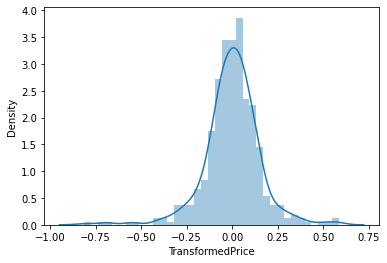

In [220]:
# Ridge Normal Dist
sns.distplot(y_test-ridge_predict_test)

<AxesSubplot:xlabel='TransformedPrice', ylabel='Density'>

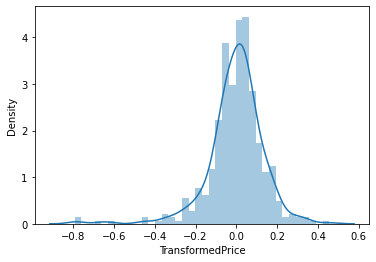

In [221]:
# Lasso Normal Dist
sns.distplot(y_test-lasso_predict_test)

In [222]:
# Find the Top 15 Features in Ridge

coefficient_df = pd.DataFrame()
coefficient_df["Column_name"] = X_train.columns
coefficient_df["Coef_value"] = pd.Series(ridge.coef_)
(coefficient_df.head(15).sort_values("Coef_value",ascending=False))

,Column_name,Coef_value
2,OverallQual,0.034807
13,GrLivArea,0.033667
10,1stFlrSF,0.027923
9,TotalBsmtSF,0.024143
3,OverallCond,0.021636
5,YearRemodAdd,0.018157
6,BsmtFinSF1,0.016589
11,2ndFlrSF,0.015853
14,BsmtFullBath,0.013113
1,LotArea,0.012118


In [223]:
# Find the Top 15 Features in lasso
coefficient_df = pd.DataFrame()
coefficient_df["Column_name"] = X_train.columns
coefficient_df["Coef_value"] = pd.Series(lasso.coef_)
(coefficient_df.head(15).sort_values("Coef_value",ascending=False))

,Column_name,Coef_value
13,GrLivArea,0.137531
2,OverallQual,0.095858
4,YearBuilt,0.057311
9,TotalBsmtSF,0.040937
3,OverallCond,0.032196
5,YearRemodAdd,0.026029
6,BsmtFinSF1,0.022656
1,LotArea,0.013692
14,BsmtFullBath,0.012699
7,BsmtFinSF2,0.000000


# Conclusion
    As per the metrics we could find that the Lasso are better than the Ridge Regression.
    Important feature are:
    
    1.GrLivArea - Buyers look for the living area square feet.
    2.OverallQual- Overall quality of the material and finish of the house.
    3.YearBuilt - Buyers look for the  date of construction.
    4.TotalBsmtSF - Total square feet of the basement.
    5.OverallCond - Overall condition of the house.
    